In [1]:
import pandas as pd

from collections import Counter

import re

import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer

from nrclex import NRCLex

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.stem import PorterStemmer

import spacy

from langdetect import detect

# import nlp

import langid

import collections

from langdetect.lang_detect_exception import LangDetectException

import locationtagger

from wordcloud import WordCloud

import gensim

from gensim.utils import simple_preprocess

import nltk

from nltk.corpus import stopwords

from gensim.models import LdaModel, CoherenceModel

from gensim.models.ldamulticore import LdaMulticore

import gensim.corpora as corpora

import gensim.corpora as MmCorpus

from gensim import models

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import pyLDAvis.gensim_models as gensimvis

import pyLDAvis


In [2]:
# Load dataset
df = pd.read_csv('your_df.csv')

In [3]:
df.head(5000)

user_Name  followers  \
0                          chiquis  5,721,916   
1                          chiquis  5,721,916   
2                          chiquis  5,721,916   
3                          chiquis  5,721,916   
4                          chiquis  5,721,916   
...                            ...        ...   
4995  competition_academy_official      1,135   
4996  competition_academy_official      1,135   
4997  competition_academy_official      1,135   
4998  competition_academy_official      1,135   
4999                    ericdier15    936,819   

                                       user_Description  \
0     Chiquis\nCon Dios Todo! -BFF 4Life!\nSinger\nE...   
1     Chiquis\nCon Dios Todo! -BFF 4Life!\nSinger\nE...   
2     Chiquis\nCon Dios Todo! -BFF 4Life!\nSinger\nE...   
3     Chiquis\nCon Dios Todo! -BFF 4Life!\nSinger\nE...   
4     Chiquis\nCon Dios Todo! -BFF 4Life!\nSinger\nE...   
...                                                 ...   
4995  Competition Academy\nEducational consultant\nH...   
4996  Competition Academy\nEducational consultant\nH...   
4997  Competition Academy\nEducational consultant\nH...   
4998  Competition Academy\nEducational consultant\nH...   
4999  Eric Dier\nSportsperson\nCo-Founder of @spotla...   

                                      post_Url likes  \
0     https://www.instagram.com/p/CqHKmO-vNQu/   NaN   
1     https://www.instagram.com/p/CqB1sDtN2gG/   NaN   
2     https://www.instagram.com/p/CqBkI9MNZhR/   NaN   
3     https://www.instagram.com/p/CqBSU7ev5bz/   NaN   
4     https://www.instagram.com/p/CqBN0PYJpgE/   NaN   
...                                        ...   ...   
4995  https://www.instagram.com/p/CkgacwVDL7L/   NaN   
4996  https://www.instagram.com/p/CkeHzltP62V/   NaN   
4997  https://www.instagram.com/p/CiVua6xj4e8/   NaN   
4998  https://www.instagram.com/p/Cer9an_jq2e/   NaN   
4999  https://www.instagram.com/p/CpswoZsjLDF/   NaN   

                                       post_Description post_Location   ID  \
0     True story. 💜💫\n\n@beflawlessskin will make yo...           NaN  416   
1     Taking notes on that “el que quiere puede” min...           NaN  416   
2     GRACIAS MEXICO!!!!! ❤️‍🔥😭🙌🏻\n@monitorlatino_\n...           NaN  416   
3     We don’t talk about this enough in the Latine ...           NaN  416   
4     I’m so honored to be celebrating #WomensHistor...           NaN  416   
...                                                 ...           ...  ...   
4995          Scoot slam 😂 @_killam_ @kyle_king @l_bwoy           NaN  449   
4996  Didn't call acid drop @tablefor_onee @sullyall...           NaN  449   
4997  🤯 Wow 😱 @aaronwheelz just stomped his first do...           NaN  449   
4998               🗡 @mikeymaybeme ⛓ via @playfactory 🤝           NaN  449   
4999                 ‘Look at me, I am the captain now’           NaN  636   

     location                                           hashtags  
0         NaN                                                 []  
1         NaN                             ['womenshistorymonth']  
2         NaN  ['monitorlatino', 'chiquis', 'porquesoyabejare...  
3         NaN                                ['chiquisandchill']  
4         NaN  ['womenshistorymonth', 'pandoramusic', 'pandor...  
...       ...                                                ...  
4995      NaN                                                 []  
4996      NaN                                                 []  
4997      NaN  ['wcmx', 'wheelchairmotocross', 'thankyouspina...  
4998      NaN                                                 []  
4999      NaN                                                 []  

[5000 rows x 10 columns]

### Quick EDA

In [4]:
# Drop duplicate rows
df = df.drop_duplicates()

In [5]:
df

user_Name  followers                                   user_Description  \
0       chiquis  5,721,916  Chiquis\nCon Dios Todo! -BFF 4Life!\nSinger\nE...   
1       chiquis  5,721,916  Chiquis\nCon Dios Todo! -BFF 4Life!\nSinger\nE...   
2       chiquis  5,721,916  Chiquis\nCon Dios Todo! -BFF 4Life!\nSinger\nE...   
3       chiquis  5,721,916  Chiquis\nCon Dios Todo! -BFF 4Life!\nSinger\nE...   
4       chiquis  5,721,916  Chiquis\nCon Dios Todo! -BFF 4Life!\nSinger\nE...   
...         ...        ...                                                ...   
23281     wisdm        NaN  Wisdom Kaye\nDirector, stylist, photographer, ...   
23282     wisdm        NaN  Wisdom Kaye\nDirector, stylist, photographer, ...   
23283     wisdm        NaN  Wisdom Kaye\nDirector, stylist, photographer, ...   
23284     wisdm        NaN  Wisdom Kaye\nDirector, stylist, photographer, ...   
23285     wisdm        NaN  Wisdom Kaye\nDirector, stylist, photographer, ...   

                                       post_Url             likes  \
0      https://www.instagram.com/p/CqHKmO-vNQu/               NaN   
1      https://www.instagram.com/p/CqB1sDtN2gG/               NaN   
2      https://www.instagram.com/p/CqBkI9MNZhR/               NaN   
3      https://www.instagram.com/p/CqBSU7ev5bz/               NaN   
4      https://www.instagram.com/p/CqBN0PYJpgE/               NaN   
...                                         ...               ...   
23281  https://www.instagram.com/p/CqOMASSOM8i/      botshelllloo   
23282  https://www.instagram.com/p/CqB2J9oPmJB/  734.601 Me gusta   
23283  https://www.instagram.com/p/Cp_RDoqMKPg/       lyricreneee   
23284  https://www.instagram.com/p/Cp8QxZ7Ovjv/          pedrozeo   
23285  https://www.instagram.com/p/Cp5-93ru50M/            ivunrv   

                                        post_Description post_Location    ID  \
0      True story. 💜💫\n\n@beflawlessskin will make yo...           NaN   416   
1      Taking notes on that “el que quiere puede” min...           NaN   416   
2      GRACIAS MEXICO!!!!! ❤️‍🔥😭🙌🏻\n@monitorlatino_\n...           NaN   416   
3      We don’t talk about this enough in the Latine ...           NaN   416   
4      I’m so honored to be celebrating #WomensHistor...           NaN   416   
...                                                  ...           ...   ...   
23281  When worlds collide #puma X #finalfantasyXIV #...           NaN  2156   
23282  High Fashion Phineas and Ferb 👀\nHad alot of f...           NaN  2156   
23283   I’m going to post this jacket like 20 more times           NaN  2156   
23284                         Most sane fashion enjoyer:           NaN  2156   
23285  Wisdom the grey. I tried putting the necklace ...           NaN  2156   

      location                                           hashtags  
0          NaN                                                 []  
1          NaN                             ['womenshistorymonth']  
2          NaN  ['monitorlatino', 'chiquis', 'porquesoyabejare...  
3          NaN                                ['chiquisandchill']  
4          NaN  ['womenshistorymonth', 'pandoramusic', 'pandor...  
...        ...                                                ...  
23281      NaN     ['puma', 'finalfantasyxiv', 'hypebeast', 'ad']  
23282      NaN                                                 []  
23283      NaN                                                 []  
23284      NaN                                                 []  
23285      NaN                                                 []  

[23286 rows x 10 columns]

In [6]:
# Fill NaN values
df = df.fillna('')

In [7]:
# We group to ensure the posts that have the same user_names followers and user_Descriptions areb contained in a grupby.
df['followers'] = df['followers'].astype(str)
df['likes'] = df['likes'].astype(str)
grouped = df.groupby(['user_Name', 'followers', 'user_Description'])
print(grouped)

In [8]:
# We join post_URLs, likes, post_Descriptions and post_locations to create one row for each influencer.
merged = grouped.agg({'post_Url': lambda x: ','.join(x), 'likes': lambda x: ','.join(x), 'post_Description': lambda x: ','.join(x), 'post_Location': lambda x: ','.join(x)})

In [9]:
df = merged.reset_index()

In [10]:
df

user_Name  followers  \
0       0nlyfitgirls_              
1     100de100marifet              
2       100montaditos              
3           12storeez              
4            1gpmuthu              
...               ...        ...   
2227  zubairatukhugov              
2228     zubbymichael  5,749,589   
2229     zvezdegranda              
2230          zyzzmad              
2231          zzdaozz              

                                       user_Description  \
0     ⭕️nlyFitGirls\nBlogger\n12 years sharing the w...   
1     Öznur Uslu\n🇹🇷Türkiye-🇫🇷 Fransa\nYeni ve deta...   
2     𝟭𝟬𝟬 𝗠𝗢𝗡𝗧𝗔𝗗𝗜𝗧𝗢𝗦\nDepende de ti cómo te lo monte...   
3     12 STOREEZ\nTienda de ropa\nКоллекция для мужч...   
4     GPMuthu 24 🔘\nArtist\nBiggboss S6\nCookuwithco...   
...                                                 ...   
2227  Zubaira Tukhugov\nUFC Fighter 19-4 Record\n•\n...   
2228  zubby michael\nActor\nhttps://youtu.be/drTnOhf...   
2229         Zvezde Granda\nTV Programme\ngrand.nova.rs   
2230  Aziz Zyzz shavershian\nComunidad\n| motivation...   
2231  Dao N. Simasthien✨\nDaoke 92💟♾\nfreelance actr...   

                                               post_Url  \
0     https://www.instagram.com/p/CqbVLmrjEKV/,https...   
1     https://www.instagram.com/p/ClWkdFID3TI/,https...   
2     https://www.instagram.com/p/Cqi3186NCvJ/,https...   
3     https://www.instagram.com/p/CqxI42KMV1Y/,https...   
4     https://www.instagram.com/p/CqVM8-APGCs/,https...   
...                                                 ...   
2227  https://www.instagram.com/p/CqazvpjMM5l/,https...   
2228  https://www.instagram.com/p/CqMJCMXjlCF/,https...   
2229  https://www.instagram.com/p/CqV3wt4KAq-/,https...   
2230  https://www.instagram.com/p/CoppL0cIqJm/,https...   
2231  https://www.instagram.com/p/Cdk4RPsFXpK/,https...   

                                                  likes  \
0     396 likes,4,300 likes,346 likes,1,134 likes,8,...   
1     7660 Me gusta,5943 Me gusta,3176 Me gusta,4476...   
2     796 Me gusta,212 Me gusta,137 Me gusta,599 Me ...   
3     603 Me gusta,16.936 Me gusta,19.129 Me gusta,8...   
4     46,614 likes,41,032 likes,99,946 likes,,36,393...   
...                                                 ...   
2227  4,508 likes,89,193 likes,50,204 likes,47,365 l...   
2228                                          ,,,,,,,,,   
2229  717 likes,838 likes,1,766 likes,3,765 likes,1,...   
2230  144.490 Me gusta,1338 Me gusta,2112 Me gusta,2...   
2231  ,48,568 likes,11,385 likes,,hasan_rio_feddab_2...   

                                       post_Description  \
0     @anabra7\n#OnlyFitGirls,@daniellebrandon7\n#On...   
1     Video’mu görenlerden ricam yoruma bir ❤️ koyab...   
2     ¿Cuál es el tuyo?\n*Todos llevan kiko crushed,...   
3     Мы уверены: гардероб — это больше, чем просто ...   
4     @kuraishi_the_entertainer,சமயபுரம் மாரியம்மன் ...   
...                                                 ...   
2227  Нереальный вкус @gorillaenergy @gorillafightin...   
2228  Midnight cruise 🔥GOD is real #ZM #A1 #doings #...   
2229  Sa kim to @voja.nedeljkovic obara ruke u Zvezd...   
2230  ,Zyzz last vlog\n.\n.\n👉 @zyzzmad Follow : Fol...   
2231  นานมากแล้วที่ไม่ได้ใช้ภาษาญี่ปุ่นที่เรียนมาเลย...   

                                          post_Location  
0                                             ,,,,,,,,,  
1                                             ,,,,,,,,,  
2                                             ,,,,,,,,,  
3     ,12storeez,,,12storeez,Rome, Italy,,París,,Azu...  
4                               ,,Chennai, India,,,,,,,  
...                                                 ...  
2227                                          ,,,,,,,,,  
2228                                          ,,,,,,,,,  
2229                                          ,,,,,,,,,  
2230      ,,,Sídney,Motivation,,Motivation,,,Motivation  
2231                                          ,,,,,,,,,  

[2232 rows x 7 columns]

In [11]:
def preprocess_text(text):
    # Define stop_words
    stop_words = ['english', 'spanish', 'portuguese', 'french', 'arabic', 'indonesian', 'russian', 'italian']
    
    # Divide in tokens
    tokens = word_tokenize(text.lower())

    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words(stop_words)]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

In [12]:
# Preprocess data
df['user_Description'] = df['user_Description'].apply(preprocess_text)
df['post_Description'] = df['post_Description'].apply(preprocess_text)
df['post_Location'] = df['post_Location'].apply(preprocess_text)
df

user_Name  followers  \
0       0nlyfitgirls_              
1     100de100marifet              
2       100montaditos              
3           12storeez              
4            1gpmuthu              
...               ...        ...   
2227  zubairatukhugov              
2228     zubbymichael  5,749,589   
2229     zvezdegranda              
2230          zyzzmad              
2231          zzdaozz              

                                       user_Description  \
0     ⭕️nlyfitgirls blogger 12 year sharing work ath...   
1     öznur uslu 🇹🇷türkiye-🇫🇷 fransa yeni detaylı v...   
2     𝟭𝟬𝟬 𝗠𝗢𝗡𝗧𝗔𝗗𝗜𝗧𝗢𝗦 depende cómo monte 🔥 tiktok : 1...   
3     12 storeez tienda ropa коллекция мужчин : @ 12...   
4     gpmuthu 24 🔘 artist biggboss s6 cookuwithcomal...   
...                                                 ...   
2227  zubaira tukhugov ufc fighter 19-4 record • воп...   
2228  zubby michael actor http : //youtu.be/drtnohfzafa   
2229           zvezde granda tv programme grand.nova.rs   
2230  aziz zyzz shavershian comunidad | motivational...   
2231  dao n. simasthien✨ daoke 92💟♾ freelance actres...   

                                               post_Url  \
0     https://www.instagram.com/p/CqbVLmrjEKV/,https...   
1     https://www.instagram.com/p/ClWkdFID3TI/,https...   
2     https://www.instagram.com/p/Cqi3186NCvJ/,https...   
3     https://www.instagram.com/p/CqxI42KMV1Y/,https...   
4     https://www.instagram.com/p/CqVM8-APGCs/,https...   
...                                                 ...   
2227  https://www.instagram.com/p/CqazvpjMM5l/,https...   
2228  https://www.instagram.com/p/CqMJCMXjlCF/,https...   
2229  https://www.instagram.com/p/CqV3wt4KAq-/,https...   
2230  https://www.instagram.com/p/CoppL0cIqJm/,https...   
2231  https://www.instagram.com/p/Cdk4RPsFXpK/,https...   

                                                  likes  \
0     396 likes,4,300 likes,346 likes,1,134 likes,8,...   
1     7660 Me gusta,5943 Me gusta,3176 Me gusta,4476...   
2     796 Me gusta,212 Me gusta,137 Me gusta,599 Me ...   
3     603 Me gusta,16.936 Me gusta,19.129 Me gusta,8...   
4     46,614 likes,41,032 likes,99,946 likes,,36,393...   
...                                                 ...   
2227  4,508 likes,89,193 likes,50,204 likes,47,365 l...   
2228                                          ,,,,,,,,,   
2229  717 likes,838 likes,1,766 likes,3,765 likes,1,...   
2230  144.490 Me gusta,1338 Me gusta,2112 Me gusta,2...   
2231  ,48,568 likes,11,385 likes,,hasan_rio_feddab_2...   

                                       post_Description  \
0     @ anabra7 # onlyfitgirls , @ daniellebrandon7 ...   
1     video ’ mu görenlerden ricam yoruma bir ❤️ koy...   
2     ¿cuál ? * llevan kiko crushed , sitio confianz...   
3     уверены : гардероб — это , просто набор вещей ...   
4     @ kuraishi_the_entertainer , சமயபுரம் மாரியம்ம...   
...                                                 ...   
2227  нереальный вкус @ gorillaenergy @ gorillafight...   
2228  midnight cruise 🔥god real # zm # a1 # doings #...   
2229  kim @ voja.nedeljkovic obara ruke u zvezdama g...   
2230  , zyzz last vlog . . 👉 @ zyzzmad follow : foll...   
2231  นานมากแล้วที่ไม่ได้ใช้ภาษาญี่ปุ่นที่เรียนมาเลย...   

                                          post_Location  
0                                     , , , , , , , , ,  
1                                     , , , , , , , , ,  
2                                     , , , , , , , , ,  
3     ,12storeez , ,,12storeez , rome , italy , ,par...  
4                      , ,chennai , india , , , , , , ,  
...                                                 ...  
2227                                  , , , , , , , , ,  
2228                                  , , , , , , , , ,  
2229                                  , , , , , , , , ,  
2230  , , , sídney , motivation , ,motivation , , , ...  
2231                                  , , , , , , , , ,  

[2232 rows x 7 columns]

In [13]:
# Create new column containing user_Description and post_Description
df['all_descriptions'] = df['user_Description'].str.cat(df['post_Description'], sep=' ')
df

user_Name  followers  \
0       0nlyfitgirls_              
1     100de100marifet              
2       100montaditos              
3           12storeez              
4            1gpmuthu              
...               ...        ...   
2227  zubairatukhugov              
2228     zubbymichael  5,749,589   
2229     zvezdegranda              
2230          zyzzmad              
2231          zzdaozz              

                                       user_Description  \
0     ⭕️nlyfitgirls blogger 12 year sharing work ath...   
1     öznur uslu 🇹🇷türkiye-🇫🇷 fransa yeni detaylı v...   
2     𝟭𝟬𝟬 𝗠𝗢𝗡𝗧𝗔𝗗𝗜𝗧𝗢𝗦 depende cómo monte 🔥 tiktok : 1...   
3     12 storeez tienda ropa коллекция мужчин : @ 12...   
4     gpmuthu 24 🔘 artist biggboss s6 cookuwithcomal...   
...                                                 ...   
2227  zubaira tukhugov ufc fighter 19-4 record • воп...   
2228  zubby michael actor http : //youtu.be/drtnohfzafa   
2229           zvezde granda tv programme grand.nova.rs   
2230  aziz zyzz shavershian comunidad | motivational...   
2231  dao n. simasthien✨ daoke 92💟♾ freelance actres...   

                                               post_Url  \
0     https://www.instagram.com/p/CqbVLmrjEKV/,https...   
1     https://www.instagram.com/p/ClWkdFID3TI/,https...   
2     https://www.instagram.com/p/Cqi3186NCvJ/,https...   
3     https://www.instagram.com/p/CqxI42KMV1Y/,https...   
4     https://www.instagram.com/p/CqVM8-APGCs/,https...   
...                                                 ...   
2227  https://www.instagram.com/p/CqazvpjMM5l/,https...   
2228  https://www.instagram.com/p/CqMJCMXjlCF/,https...   
2229  https://www.instagram.com/p/CqV3wt4KAq-/,https...   
2230  https://www.instagram.com/p/CoppL0cIqJm/,https...   
2231  https://www.instagram.com/p/Cdk4RPsFXpK/,https...   

                                                  likes  \
0     396 likes,4,300 likes,346 likes,1,134 likes,8,...   
1     7660 Me gusta,5943 Me gusta,3176 Me gusta,4476...   
2     796 Me gusta,212 Me gusta,137 Me gusta,599 Me ...   
3     603 Me gusta,16.936 Me gusta,19.129 Me gusta,8...   
4     46,614 likes,41,032 likes,99,946 likes,,36,393...   
...                                                 ...   
2227  4,508 likes,89,193 likes,50,204 likes,47,365 l...   
2228                                          ,,,,,,,,,   
2229  717 likes,838 likes,1,766 likes,3,765 likes,1,...   
2230  144.490 Me gusta,1338 Me gusta,2112 Me gusta,2...   
2231  ,48,568 likes,11,385 likes,,hasan_rio_feddab_2...   

                                       post_Description  \
0     @ anabra7 # onlyfitgirls , @ daniellebrandon7 ...   
1     video ’ mu görenlerden ricam yoruma bir ❤️ koy...   
2     ¿cuál ? * llevan kiko crushed , sitio confianz...   
3     уверены : гардероб — это , просто набор вещей ...   
4     @ kuraishi_the_entertainer , சமயபுரம் மாரியம்ம...   
...                                                 ...   
2227  нереальный вкус @ gorillaenergy @ gorillafight...   
2228  midnight cruise 🔥god real # zm # a1 # doings #...   
2229  kim @ voja.nedeljkovic obara ruke u zvezdama g...   
2230  , zyzz last vlog . . 👉 @ zyzzmad follow : foll...   
2231  นานมากแล้วที่ไม่ได้ใช้ภาษาญี่ปุ่นที่เรียนมาเลย...   

                                          post_Location  \
0                                     , , , , , , , , ,   
1                                     , , , , , , , , ,   
2                                     , , , , , , , , ,   
3     ,12storeez , ,,12storeez , rome , italy , ,par...   
4                      , ,chennai , india , , , , , , ,   
...                                                 ...   
2227                                  , , , , , , , , ,   
2228                                  , , , , , , , , ,   
2229                                  , , , , , , , , ,   
2230  , , , sídney , motivation , ,motivation , , , ...   
2231                                  , , , , , , , , ,   

                                  

### Sentiment analysis

In [14]:
# Open vader_lexicon.txt and create dictionary with same structure as vader_lexicon.txt
with open('vader_lexicon.txt', 'r') as f:
    lines = f.readlines()

emotion_lexicon = {}
for line in lines:
    word, emotion, value = line.strip().split('\t')
    if word not in emotion_lexicon:
        emotion_lexicon[word] = {}
    emotion_lexicon[word][emotion] = int(value)

# Define the emotions you would like to categorise your users into.
emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust']

# Define a function to get the emotion scores for every row
def get_emotion_scores(row):
    text = row['all_descriptions']
    emotion_scores = {e: 0 for e in emotions}
    for word in text.split():
        if word in emotion_lexicon:
            for e in emotions:
                if emotion_lexicon[word].get(e, 0) == 1:
                    emotion_scores[e] += 1
    return pd.Series(emotion_scores)

emotion_df = df.apply(get_emotion_scores, axis=1)

# Normalize the emotion scores using z-score
emotion_df_zscore = (emotion_df - emotion_df.mean()) / emotion_df.std()

# Add the emotion scores to df_emotion
df_emotion = pd.concat([df, emotion_df_zscore], axis=1)

In [15]:
# Concat df and df_emotion to get the final dataset.
df_emotion.head(5)

user_Name followers  \
0    0nlyfitgirls_             
1  100de100marifet             
2    100montaditos             
3        12storeez             
4         1gpmuthu             

                                    user_Description  \
0  ⭕️nlyfitgirls blogger 12 year sharing work ath...   
1  öznur uslu 🇹🇷türkiye-🇫🇷 fransa yeni detaylı v...   
2  𝟭𝟬𝟬 𝗠𝗢𝗡𝗧𝗔𝗗𝗜𝗧𝗢𝗦 depende cómo monte 🔥 tiktok : 1...   
3  12 storeez tienda ropa коллекция мужчин : @ 12...   
4  gpmuthu 24 🔘 artist biggboss s6 cookuwithcomal...   

                                            post_Url  \
0  https://www.instagram.com/p/CqbVLmrjEKV/,https...   
1  https://www.instagram.com/p/ClWkdFID3TI/,https...   
2  https://www.instagram.com/p/Cqi3186NCvJ/,https...   
3  https://www.instagram.com/p/CqxI42KMV1Y/,https...   
4  https://www.instagram.com/p/CqVM8-APGCs/,https...   

                                               likes  \
0  396 likes,4,300 likes,346 likes,1,134 likes,8,...   
1  7660 Me gusta,5943 Me gusta,3176 Me gusta,4476...   
2  796 Me gusta,212 Me gusta,137 Me gusta,599 Me ...   
3  603 Me gusta,16.936 Me gusta,19.129 Me gusta,8...   
4  46,614 likes,41,032 likes,99,946 likes,,36,393...   

                                    post_Description  \
0  @ anabra7 # onlyfitgirls , @ daniellebrandon7 ...   
1  video ’ mu görenlerden ricam yoruma bir ❤️ koy...   
2  ¿cuál ? * llevan kiko crushed , sitio confianz...   
3  уверены : гардероб — это , просто набор вещей ...   
4  @ kuraishi_the_entertainer , சமயபுரம் மாரியம்ம...   

                                       post_Location  \
0                                  , , , , , , , , ,   
1                                  , , , , , , , , ,   
2                                  , , , , , , , , ,   
3  ,12storeez , ,,12storeez , rome , italy , ,par...   
4                   , ,chennai , india , , , , , , ,   

                                    all_descriptions     anger  anticipation  \
0  ⭕️nlyfitgirls blogger 12 year sharing work ath... -0.470647     -0.716586   
1  öznur uslu 🇹🇷türkiye-🇫🇷 fransa yeni detaylı v... -0.259579     -0.716586   
2  𝟭𝟬𝟬 𝗠𝗢𝗡𝗧𝗔𝗗𝗜𝗧𝗢𝗦 depende cómo monte 🔥 tiktok : 1... -0.259579     -0.716586   
3  12 storeez tienda ropa коллекция мужчин : @ 12... -0.470647     -0.716586   
4  gpmuthu 24 🔘 artist biggboss s6 cookuwithcomal... -0.470647     -0.625601   

    disgust      fear       joy  negative  positive   sadness  surprise  \
0 -0.402072 -0.458863 -0.710005 -0.526352 -0.655933 -0.512634 -0.662622   
1 -0.076800 -0.305588 -0.710005 -0.300838 -0.699290 -0.303035 -0.662622   
2 -0.076800 -0.305588 -0.710005 -0.300838 -0.655933 -0.303035 -0.662622   
3 -0.402072 -0.458863 -0.625666 -0.526352 -0.612576 -0.512634 -0.662622   
4 -0.402072 -0.458863 -0.710005 -0.526352 -0.699290 -0.512634 -0.662622   

      trust  
0 -0.439565  
1 -0.679562  
2 -0.599563  
3 -0.599563  
4 -0.679562

### NER Implementation

In [16]:
# We use googletrans library to check the wellness of the traductions.
# A new column called translations will contain the translations for post_description. 
from googletrans import Translator

translator = Translator()
descripciones = []

for index, row in df.iterrows():
    text = row['post_Description']
    if text:
        try:
            language = detect(text)
            if language != 'en':
                translated = translator.translate(text, src=language, dest="en")
                descripcion = str(translated.text)
                descripciones.append(descripcion)
            else:
                descripciones.append(text)
        except:
            # if there is an error in translation, we can leave the original text
            descripciones.append(text)
    else:
        descripciones.append(text)

df['translations'] = descripciones

In [17]:
# Use langdetect to get the language present in the influencer's account.
def detect_languages(text):
    if len(text) < 10:
        return []
    try:
        lang = detect(text)
        return [lang]
    except LangDetectException:
        return []


languageslist = df["all_descriptions"].apply(detect_languages)
print(languageslist)

0       [en]
1       [tr]
2       [es]
3       [ru]
4       [en]
        ... 
2227    [ru]
2228    [en]
2229    [hr]
2230    [en]
2231    [th]
Name: all_descriptions, Length: 2232, dtype: object


In [18]:
mylist = []
for i in languageslist:
    mylist.append(i)

print(mylist)


[['en'], ['tr'], ['es'], ['ru'], ['en'], ['fr'], ['en'], ['en'], ['en'], ['en'], ['no'], ['en'], ['ar'], ['es'], ['id'], ['en'], ['en'], ['en'], ['no'], ['it'], ['en'], ['en'], ['es'], ['ko'], ['en'], ['es'], ['en'], ['es'], ['en'], ['en'], ['en'], ['es'], ['es'], ['en'], ['en'], ['ru'], ['en'], ['en'], ['en'], ['id'], ['en'], ['en'], ['en'], ['en'], ['es'], ['id'], ['en'], ['en'], ['en'], ['en'], ['en'], ['es'], ['pt'], ['en'], ['en'], ['en'], ['en'], ['es'], ['en'], ['en'], ['en'], ['id'], ['hr'], ['en'], ['it'], ['es'], ['en'], ['en'], ['en'], ['en'], ['id'], ['so'], ['en'], ['ru'], ['en'], ['en'], ['so'], ['en'], ['en'], ['es'], ['en'], ['id'], ['id'], ['es'], ['hi'], ['en'], ['en'], ['en'], ['tr'], ['ko'], ['tr'], ['en'], ['ca'], ['en'], ['id'], ['es'], ['es'], ['ru'], ['es'], ['it'], ['en'], ['en'], ['en'], ['en'], ['en'], ['fr'], ['pt'], ['en'], ['id'], ['id'], ['ro'], ['fa'], ['en'], ['en'], ['it'], ['en'], ['tr'], ['id'], ['en'], ['id'], ['ca'], ['id'], ['ar'], ['id'], ['en'],

In [19]:
# Get the frecuency for the appearance of each language in the dataset.
# This will allow us to load the models for the languages with the greatest appearance because some languages are not present in Spacy!
freq = {}

for sublist in mylist:
    for lang in sublist:
        if lang in freq:
            freq[lang] += 1
        else:
            freq[lang] = 1

print(freq)

{'en': 1352, 'tr': 52, 'es': 218, 'ru': 29, 'fr': 32, 'no': 4, 'ar': 45, 'id': 157, 'it': 45, 'ko': 5, 'pt': 141, 'hr': 3, 'so': 10, 'hi': 5, 'ca': 6, 'ro': 3, 'fa': 22, 'da': 3, 'cs': 4, 'th': 17, 'de': 15, 'ml': 3, 'nl': 4, 'pl': 7, 'vi': 4, 'uk': 2, 'kn': 1, 'sk': 1, 'bg': 1, 'sw': 12, 'sv': 2, 'te': 1, 'tl': 2, 'mr': 1, 'ja': 4, 'el': 2, 'he': 2, 'et': 5, 'ta': 2, 'fi': 3, 'sl': 2, 'hu': 1}


In [20]:
unique_values = set(value for sublist in mylist for value in sublist)

print(unique_values)

{'pl', 'ro', 'fa', 'ca', 'sw', 'el', 'ml', 'bg', 'hu', 'ko', 'so', 'no', 'cs', 'vi', 'tr', 'ja', 'nl', 'et', 'sv', 'he', 'mr', 'ta', 'th', 'sl', 'da', 'uk', 'en', 'tl', 'de', 'id', 'fr', 'hi', 'ar', 'pt', 'sk', 'fi', 'kn', 'hr', 'ru', 'te', 'it', 'es'}


In [21]:
# You can use this code to display the models installed in Spacy in case one is not working.
# pip install "name of the model"
import spacy

models = spacy.util.get_installed_models()

print("The following models are installed:")
for model in models:
    print(model)

The following models are installed:
es_core_news_lg
en_core_web_lg
fr_core_news_lg
it_core_news_lg
xx_ent_wiki_sm
pt_core_news_lg
en_core_web_sm
es_core_news_sm


In [22]:
nlp_english = spacy.load("en_core_web_lg")
nlp_spanish = spacy.load("es_core_news_lg")
nlp_portuguese = spacy.load("pt_core_news_lg")
nlp_french = spacy.load("fr_core_news_lg")
nlp_italian = spacy.load("it_core_news_lg")
nlp_any = spacy.load("xx_ent_wiki_sm")

def extract_locations(text):
    if len(text) < 10:  # Check if text is at least 10 characters long
        return []
    try:
        lang_code = detect(text)
    except LangDetectException:
        return []
    # Use the model for the language found in text.
    if lang_code == "en":
        nlp = nlp_english
    elif lang_code == "es":
        nlp = nlp_spanish
    elif lang_code == "pt":
        nlp = nlp_portuguese
    elif lang_code == "it":
        nlp = nlp_italian
    elif lang_code == "fr":
        nlp = nlp_french
    elif lang_code in ['ar', 'bg', 'ca', 'cs', 'da', 'de', 'el', 'en', 'es', 'et', 'fa', 'fi', 'fr', 'he', 'hi', 'hr', 'hu', 'id', 'it', 'ja', 'kk', 'ko', 'lt', 'lv', 'mk', 'ml', 'mr', 'nb', 'nl', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl', 'sq', 'sr', 'sv', 'ta', 'th', 'tr', 'uk', 'ur', 'vi', 'zh']:
        nlp = nlp_any
    else:
        return []
    locations = locationtagger.find_locations(text = text)
    locations = locations.countries, locations.cities #locations.country_regions, locations.country_cities, locations.other_countries, locations.region_cities, locations.other_regions, locations.other
    return locations
df['locationsfull'] = df["all_descriptions"].apply(extract_locations)
df

user_Name  followers  \
0       0nlyfitgirls_              
1     100de100marifet              
2       100montaditos              
3           12storeez              
4            1gpmuthu              
...               ...        ...   
2227  zubairatukhugov              
2228     zubbymichael  5,749,589   
2229     zvezdegranda              
2230          zyzzmad              
2231          zzdaozz              

                                       user_Description  \
0     ⭕️nlyfitgirls blogger 12 year sharing work ath...   
1     öznur uslu 🇹🇷türkiye-🇫🇷 fransa yeni detaylı v...   
2     𝟭𝟬𝟬 𝗠𝗢𝗡𝗧𝗔𝗗𝗜𝗧𝗢𝗦 depende cómo monte 🔥 tiktok : 1...   
3     12 storeez tienda ropa коллекция мужчин : @ 12...   
4     gpmuthu 24 🔘 artist biggboss s6 cookuwithcomal...   
...                                                 ...   
2227  zubaira tukhugov ufc fighter 19-4 record • воп...   
2228  zubby michael actor http : //youtu.be/drtnohfzafa   
2229           zvezde granda tv programme grand.nova.rs   
2230  aziz zyzz shavershian comunidad | motivational...   
2231  dao n. simasthien✨ daoke 92💟♾ freelance actres...   

                                               post_Url  \
0     https://www.instagram.com/p/CqbVLmrjEKV/,https...   
1     https://www.instagram.com/p/ClWkdFID3TI/,https...   
2     https://www.instagram.com/p/Cqi3186NCvJ/,https...   
3     https://www.instagram.com/p/CqxI42KMV1Y/,https...   
4     https://www.instagram.com/p/CqVM8-APGCs/,https...   
...                                                 ...   
2227  https://www.instagram.com/p/CqazvpjMM5l/,https...   
2228  https://www.instagram.com/p/CqMJCMXjlCF/,https...   
2229  https://www.instagram.com/p/CqV3wt4KAq-/,https...   
2230  https://www.instagram.com/p/CoppL0cIqJm/,https...   
2231  https://www.instagram.com/p/Cdk4RPsFXpK/,https...   

                                                  likes  \
0     396 likes,4,300 likes,346 likes,1,134 likes,8,...   
1     7660 Me gusta,5943 Me gusta,3176 Me gusta,4476...   
2     796 Me gusta,212 Me gusta,137 Me gusta,599 Me ...   
3     603 Me gusta,16.936 Me gusta,19.129 Me gusta,8...   
4     46,614 likes,41,032 likes,99,946 likes,,36,393...   
...                                                 ...   
2227  4,508 likes,89,193 likes,50,204 likes,47,365 l...   
2228                                          ,,,,,,,,,   
2229  717 likes,838 likes,1,766 likes,3,765 likes,1,...   
2230  144.490 Me gusta,1338 Me gusta,2112 Me gusta,2...   
2231  ,48,568 likes,11,385 likes,,hasan_rio_feddab_2...   

                                       post_Description  \
0     @ anabra7 # onlyfitgirls , @ daniellebrandon7 ...   
1     video ’ mu görenlerden ricam yoruma bir ❤️ koy...   
2     ¿cuál ? * llevan kiko crushed , sitio confianz...   
3     уверены : гардероб — это , просто набор вещей ...   
4     @ kuraishi_the_entertainer , சமயபுரம் மாரியம்ம...   
...                                                 ...   
2227  нереальный вкус @ gorillaenergy @ gorillafight...   
2228  midnight cruise 🔥god real # zm # a1 # doings #...   
2229  kim @ voja.nedeljkovic obara ruke u zvezdama g...   
2230  , zyzz last vlog . . 👉 @ zyzzmad follow : foll...   
2231  นานมากแล้วที่ไม่ได้ใช้ภาษาญี่ปุ่นที่เรียนมาเลย...   

                                          post_Location  \
0                                     , , , , , , , , ,   
1                                     , , , , , , , , ,   
2                                     , , , , , , , , ,   
3     ,12storeez , ,,12storeez , rome , italy , ,par...   
4                      , ,chennai , india , , , , , , ,   
...                                                 ...   
2227                                  , , , , , , , , ,   
2228                                  , , , , , , , , ,   
2229                                  , , , , , , , , ,   
2230  , , , sídney , motivation , ,motivation , , , ...   
2231                                  , , , , , , , , ,   

                                  

In [23]:
df.head(20)

user_Name followers  \
0             0nlyfitgirls_             
1           100de100marifet             
2             100montaditos             
3                 12storeez             
4                  1gpmuthu             
5               1minute2rap   775,426   
6        20thcenturystudios             
7              2niteflavour             
8             30deepgrimeyy             
9                   42psy42             
10                433skills             
11                    6lack             
12            7sainaljassmi             
13             898sosamafia             
14                Top Posts             
15        _.bracefacelaii._       253   
16         ___adultgram____    63,808   
17              ___aryan___             
18               __glamtime             
19  _adolescenza__official_    24,572   

                                     user_Description  \
0   ⭕️nlyfitgirls blogger 12 year sharing work ath...   
1   öznur uslu 🇹🇷türkiye-🇫🇷 fransa yeni detaylı v...   
2   𝟭𝟬𝟬 𝗠𝗢𝗡𝗧𝗔𝗗𝗜𝗧𝗢𝗦 depende cómo monte 🔥 tiktok : 1...   
3   12 storeez tienda ropa коллекция мужчин : @ 12...   
4   gpmuthu 24 🔘 artist biggboss s6 cookuwithcomal...   
5   1minute2rap musician/band 🎧 | mettre lumière a...   
6   20th century studio boston strangler , inspire...   
7   flavour africa músico/grupo música booking : 📧...   
8   30deepgrimeyy_duce 🔥 independent artist🔥 booki...   
9               psy psy p nation youtu.be/eyp0spkcbuu   
10  433 skill comunidad home skill powered @ 433 🔋...   
11            black sihal - 💐 6lack.lnk.to/sihalalbum   
12  hussain jassmi حسين الجسمي emirati 🇦🇪 إماراتي ...   
13  julianno sosa 🏚 artist ceo : sosa mafia 🇨🇱 www...   
14                                                      
15  brace face laii 5|29🎂🤪|| laii baby♥️🙂 positive...   
16  adultgram❤️ official adult page instagram ❤️ •...   
17                                         aryan khan   
18  glam time beauty , cosmetic & personal care br...   
19  official adolescenza ♦️ condividi 📲 ♦️ info co...   

                                             post_Url  \
0   https://www.instagram.com/p/CqbVLmrjEKV/,https...   
1   https://www.instagram.com/p/ClWkdFID3TI/,https...   
2   https://www.instagram.com/p/Cqi3186NCvJ/,https...   
3   https://www.instagram.com/p/CqxI42KMV1Y/,https...   
4   https://www.instagram.com/p/CqVM8-APGCs/,https...   
5   https://www.instagram.com/p/CqLq6zdjCsr/,https...   
6   https://www.instagram.com/p/CoA97ILsOec/,https...   
7   https://www.instagram.com/p/Cmbf_-XOoR3/,https...   
8   https://www.instagram.com/p/CoIjuKwAnZ-/,https...   
9   https://www.instagram.com/p/CqxI794gBH6/,https...   
10  https://www.instagram.com/p/Ce_UKmTqdU2/,https...   
11  https://www.instagram.com/p/CqjCUiCuySP/,https...   
12  https://www.instagram.com/p/CqWMtEFIqfi/,https...   
13  https://www.instagram.com/p/CqGvzKZLa-c/,https...   
14  https://www.instagram.com/p/BbJDf1jgylW/,https...   
15  https://www.instagram.com/p/BkjuhYDHiVT/,https...   
16  https://www.instagram.com/p/CjzSC0rOl1s/,https...   
17  https://www.instagram.com/p/Cl1JVwjqwPX/,https...   
18  https://www.instagram.com/p/CqBRtmpIysC/,https...   
19  https://www.instagram.com/p/CqQUmDPgogH/,https...   

                                                likes  \
0   396 likes,4,300 likes,346 likes,1,134 likes,8,...   
1   7660 Me gusta,5943 Me gusta,3176 Me gusta,4476...   
2   796 Me gusta,212 Me gusta,137 Me gusta,599 Me ...   
3   603 Me gusta,16.936 Me gusta,19.129 Me gusta,8...   
4   46,614 likes,41,032 likes,99,946 likes,,36,393...   
5                                           ,,,,,,,,,   
6   26.235 Me gusta,19.187 Me gusta,1360 Me gusta,...   
7   michaelreyayimba,61.129 Me gusta,ginia.bliz,53...   
8   m.kkaayy,ih33p,26,159 likes,quanfrmetx,13,075 ...   
9   38.538 Me gusta,34.110 Me gusta,15.980 Me gust...   
10  475.364 Me gusta,171.884 Me gusta,13.881 Me gu...   
11  b.boy_delphic,avvexz,clouds____,kw_brazza,alee...   
12  15,271 likes,7,

### LDA

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Library/Frameworks/Python.framework/Versions/3.9/lib/pytho

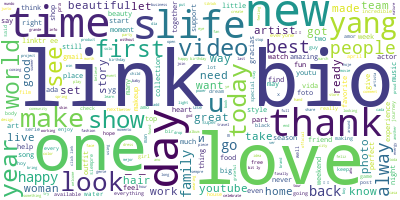

In [24]:
# Create a wordcloud object to display a representation with the words with greatest appearance within text.
long_string = ','.join(list(df['all_descriptions'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [25]:
# Counter for the appearance of the words in the text
def count_words(text):
    words = re.findall('\w+', text.lower())
    return Counter(words)

all_text = ' '.join(df['all_descriptions'])
word_count = count_words(all_text)

# Sort the list in descinding order (Starting from the word with greatest appearance.)
sorted_words = sorted(word_count.items(), key=lambda x: x[1], reverse=True)
print(sorted_words)
print(len(sorted_words))

[('com', 1885), ('1', 1880), ('love', 1732), ('link', 1533), ('2', 1503), ('bio', 1466), ('new', 1435), ('u', 1232), ('day', 1167), ('s', 1146), ('one', 1143), ('time', 1086), ('3', 1057), ('like', 1017), ('yang', 1012), ('year', 951), ('get', 947), ('life', 895), ('make', 862), ('video', 833), ('happy', 833), ('2023', 767), ('thank', 761), ('follow', 761), ('4', 709), ('5', 698), ('www', 697), ('see', 651), ('look', 645), ('first', 636), ('best', 630), ('youtube', 624), ('ന', 604), ('go', 598), ('people', 589), ('world', 575), ('fashion', 573), ('back', 560), ('today', 545), ('reel', 537), ('10', 515), ('know', 510), ('woman', 509), ('available', 506), ('show', 501), ('и', 500), ('hair', 499), ('ക', 499), ('beautiful', 495), ('good', 481), ('story', 480), ('let', 477), ('always', 473), ('photo', 472), ('friend', 471), ('week', 469), ('_', 453), ('want', 453), ('work', 452), ('family', 443), ('instagram', 441), ('makeup', 439), ('full', 432), ('much', 431), ('collection', 430), ('tag',

<>:3: DeprecationWarning: invalid escape sequence \w
<>:3: DeprecationWarning: invalid escape sequence \w
/var/folders/ng/n9ng0wy92t90_49j662nh02c0000gn/T/ipykernel_28437/3874004469.py:3: DeprecationWarning: invalid escape sequence \w
  words = re.findall('\w+', text.lower())


In [26]:
# We are not lemmatizing again. Bear in mind that the different data_preparation steps are not specific for the method you are using,
# instead you will need to prepare your data depenmding in  the specifics og your data. Here I take on some methods that are applicable 
# To my specific case and data.

# Download stopwords from the main languages to be used.
nltk.download('stopwords')
social_terms = ['com', 'love', 'link', 'bio', 'new', 'u', 'day', 's', 'one', 'time', 'like', 'yang', 'year', 'get', 'life', 'make', 'video', 'happy', '2023', 'thank', 'follow', 'www', 'see', 'look', 'first', 'best', 'youtube', 'ന', 'go', 'people', 'world', 'fashion', 'back', 'today', 'reel', 'know', 'woman', 'available', 'show', 'hashtag', 'follow', 'like', 'comment', 'share', 'tweet', 'retweet', 'post', 'story', 'feed', 'influencer', 'viral', 'tag', 'DM', 'meme', 'follower', 'friend', 'connection', 'network', 'status', 'notification', 'profile', 'timeline', 'mention', 'caption', 'selfie', 'filter', 'snap', 'streak', 'trending', 'emoji', 'live', 'stream', 'subscribe', 'unfollow', 'block', 'mute', 'report', 'community', 'group', 'forum', 'thread', 'moderator', 'admin', 'troll', 'cyberbully', 'privacy', 'security', 'algorithm', 'analytics']

def remove_stopwords(text):
    english_stopwords = set(stopwords.words('english'))
    french_stopwords = set(stopwords.words('french'))
    spanish_stopwords = set(stopwords.words('spanish'))
    italian_stopwords = set(stopwords.words('italian'))
    arabic_stopwords = set(stopwords.words('arabic'))
    indonesian_stopwords = set(stopwords.words('indonesian'))
    portuguese_stopwords = set(stopwords.words('portuguese'))
    russian_stopwords = set(stopwords.words('russian'))

    all_stopwords = english_stopwords.union(french_stopwords, spanish_stopwords, italian_stopwords, arabic_stopwords, indonesian_stopwords, portuguese_stopwords, russian_stopwords)

    # Tokenize
    words = word_tokenize(text)

    # Remove stopwords
    words = [word for word in words if word not in all_stopwords]

    # Join the words back together into a string
    filtered_text = ' '.join(words)
    
    return filtered_text

def remove_non_alphabetic(text):
    # Replace everything that is not a letter or space with an empty string beacuse your data can have many of these.
    return re.sub(r'[^a-zA-Z\s]', '', text)

def remove_social_terms(text):
    # Replace everything that is a social media typical word with an empty string
    regex = r'\b(' + '|'.join(social_terms) + r')\b'
    filtered_text = re.sub(regex, '', text, flags=re.IGNORECASE)
    return filtered_text


df['all_descriptions'] = df['all_descriptions'].astype(str)

df['all_descriptions'] = df['all_descriptions'].apply(lambda x: x.lower())

df['all_descriptions'] = df['all_descriptions'].apply(remove_stopwords)

df['all_descriptions'] = df['all_descriptions'].apply(remove_non_alphabetic)

df['all_descriptions'] = df['all_descriptions'].apply(remove_social_terms)

df

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1129)>


user_Name  followers  \
0       0nlyfitgirls_              
1     100de100marifet              
2       100montaditos              
3           12storeez              
4            1gpmuthu              
...               ...        ...   
2227  zubairatukhugov              
2228     zubbymichael  5,749,589   
2229     zvezdegranda              
2230          zyzzmad              
2231          zzdaozz              

                                       user_Description  \
0     ⭕️nlyfitgirls blogger 12 year sharing work ath...   
1     öznur uslu 🇹🇷türkiye-🇫🇷 fransa yeni detaylı v...   
2     𝟭𝟬𝟬 𝗠𝗢𝗡𝗧𝗔𝗗𝗜𝗧𝗢𝗦 depende cómo monte 🔥 tiktok : 1...   
3     12 storeez tienda ropa коллекция мужчин : @ 12...   
4     gpmuthu 24 🔘 artist biggboss s6 cookuwithcomal...   
...                                                 ...   
2227  zubaira tukhugov ufc fighter 19-4 record • воп...   
2228  zubby michael actor http : //youtu.be/drtnohfzafa   
2229           zvezde granda tv programme grand.nova.rs   
2230  aziz zyzz shavershian comunidad | motivational...   
2231  dao n. simasthien✨ daoke 92💟♾ freelance actres...   

                                               post_Url  \
0     https://www.instagram.com/p/CqbVLmrjEKV/,https...   
1     https://www.instagram.com/p/ClWkdFID3TI/,https...   
2     https://www.instagram.com/p/Cqi3186NCvJ/,https...   
3     https://www.instagram.com/p/CqxI42KMV1Y/,https...   
4     https://www.instagram.com/p/CqVM8-APGCs/,https...   
...                                                 ...   
2227  https://www.instagram.com/p/CqazvpjMM5l/,https...   
2228  https://www.instagram.com/p/CqMJCMXjlCF/,https...   
2229  https://www.instagram.com/p/CqV3wt4KAq-/,https...   
2230  https://www.instagram.com/p/CoppL0cIqJm/,https...   
2231  https://www.instagram.com/p/Cdk4RPsFXpK/,https...   

                                                  likes  \
0     396 likes,4,300 likes,346 likes,1,134 likes,8,...   
1     7660 Me gusta,5943 Me gusta,3176 Me gusta,4476...   
2     796 Me gusta,212 Me gusta,137 Me gusta,599 Me ...   
3     603 Me gusta,16.936 Me gusta,19.129 Me gusta,8...   
4     46,614 likes,41,032 likes,99,946 likes,,36,393...   
...                                                 ...   
2227  4,508 likes,89,193 likes,50,204 likes,47,365 l...   
2228                                          ,,,,,,,,,   
2229  717 likes,838 likes,1,766 likes,3,765 likes,1,...   
2230  144.490 Me gusta,1338 Me gusta,2112 Me gusta,2...   
2231  ,48,568 likes,11,385 likes,,hasan_rio_feddab_2...   

                                       post_Description  \
0     @ anabra7 # onlyfitgirls , @ daniellebrandon7 ...   
1     video ’ mu görenlerden ricam yoruma bir ❤️ koy...   
2     ¿cuál ? * llevan kiko crushed , sitio confianz...   
3     уверены : гардероб — это , просто набор вещей ...   
4     @ kuraishi_the_entertainer , சமயபுரம் மாரியம்ம...   
...                                                 ...   
2227  нереальный вкус @ gorillaenergy @ gorillafight...   
2228  midnight cruise 🔥god real # zm # a1 # doings #...   
2229  kim @ voja.nedeljkovic obara ruke u zvezdama g...   
2230  , zyzz last vlog . . 👉 @ zyzzmad follow : foll...   
2231  นานมากแล้วที่ไม่ได้ใช้ภาษาญี่ปุ่นที่เรียนมาเลย...   

                                          post_Location  \
0                                     , , , , , , , , ,   
1                                     , , , , , , , , ,   
2                                     , , , , , , , , ,   
3     ,12storeez , ,,12storeez , rome , italy , ,par...   
4                      , ,chennai , india , , , , , , ,   
...                                                 ...   
2227                                  , , , , , , , , ,   
2228                                  , , , , , , , , ,   
2229                                  , , , , , , , , ,   
2230  , , , sídney , motivation , ,motivation , , , ...   
2231                                  , , , , , , , , ,   

                                  

In [27]:
def count_words(text):
    words = re.findall('\w+', text.lower())
    return Counter(words)

all_text = ' '.join(df['all_descriptions'])
word_count = count_words(all_text)

sorted_words = sorted(word_count.items(), key=lambda x: x[1], reverse=True)
print(sorted_words)
print(len(sorted_words))

[('x', 503), ('beautiful', 495), ('hair', 490), ('good', 475), ('let', 474), ('always', 469), ('week', 460), ('photo', 460), ('makeup', 456), ('want', 453), ('work', 443), ('family', 440), ('last', 428), ('much', 426), ('collection', 425), ('every', 424), ('th', 422), ('way', 419), ('instagram', 417), ('take', 416), ('full', 413), ('team', 408), ('need', 407), ('home', 403), ('art', 399), ('style', 390), ('artist', 389), ('also', 379), ('birthday', 379), ('night', 373), ('music', 370), ('thing', 360), ('support', 357), ('made', 355), ('g', 345), ('shop', 344), ('use', 342), ('feel', 342), ('check', 340), ('amazing', 339), ('pm', 338), ('watch', 335), ('great', 335), ('help', 334), ('right', 325), ('got', 324), ('set', 320), ('gracias', 319), ('online', 318), ('http', 315), ('outfit', 312), ('girl', 310), ('never', 308), ('bir', 305), ('actor', 302), ('ready', 302), ('many', 300), ('season', 300), ('favorite', 299), ('say', 298), ('big', 297), ('beauty', 297), ('april', 294), ('m', 293)

<>:2: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
/var/folders/ng/n9ng0wy92t90_49j662nh02c0000gn/T/ipykernel_28437/1567794564.py:2: DeprecationWarning: invalid escape sequence \w
  words = re.findall('\w+', text.lower())


In [28]:
# We create the dictionary.
try_documents = [word_tokenize(desc.lower()) for desc in df['all_descriptions']]
documents = [[token for token in doc if isinstance(token, str)] for doc in try_documents]
id2word = corpora.Dictionary(documents)
id2word.save('dictionary.gensim')

# Term Document Frequency
corpus = [id2word.doc2bow(doc) for doc in documents]
corpora.MmCorpus.serialize('corpus.mm', corpus)
corpus = corpora.MmCorpus('corpus.mm')
print(corpus)
dictionary = corpora.Dictionary.load('dictionary.gensim')

new_documents = [[id2word[id] for id, freq in doc] for doc in corpus]
new_corpus = [dictionary.doc2bow(doc) for doc in new_documents]

MmCorpus(2232 documents, 102771 features, 292405 non-zero entries)


In [29]:
# Define the parameter grid to search over.
coherence_scores = []

# Loop to get the best combination of coherence and perplexity, 
for num_topics in range(2, 30):
    lda_model = LdaModel(corpus=new_corpus, id2word=dictionary, num_topics=num_topics, random_state=100, update_every=1, passes=10, alpha='auto', per_word_topics=True)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=new_documents, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_score)
    print('Number of topics:', num_topics, ' Coherence Score:', coherence_score)
    print('Perplexity:', lda_model.log_perplexity(new_corpus))

# Print your results.
best_num_topics = range(2, 30)[coherence_scores.index(max(coherence_scores))]
print('Best number of topics:', best_num_topics)

Number of topics: 2  Coherence Score: 0.9440901227128045
Perplexity: -10.79603017705298
Number of topics: 3  Coherence Score: 0.8409750305046743
Perplexity: -10.745232290931925
Number of topics: 4  Coherence Score: 0.7821755364802369
Perplexity: -10.742536142921544
Number of topics: 5  Coherence Score: 0.8482529414584116
Perplexity: -10.791861745122977
Number of topics: 6  Coherence Score: 0.8122756971783675
Perplexity: -10.857114105840948
Number of topics: 7  Coherence Score: 0.9223534685930648
Perplexity: -10.90965495176867
Number of topics: 8  Coherence Score: 0.7902633219858383
Perplexity: -11.027118010124033
Number of topics: 9  Coherence Score: 0.7856899542481037
Perplexity: -11.27280562496147
Number of topics: 10  Coherence Score: 0.7114772666558825
Perplexity: -11.528052258442594
Number of topics: 11  Coherence Score: 0.7920642436212421
Perplexity: -11.89251120503414
Number of topics: 12  Coherence Score: 0.7275732156540785
Perplexity: -12.22775394321874
Number of topics: 13  C

In [30]:
# Set the number of topics
num_topics = 7

# Build the LDA model
lda_model = gensim.models.LdaModel(corpus=new_corpus,
                                   id2word=id2word,
                                   num_topics=num_topics,
                                   random_state=100,
                                   update_every=1,
                                   passes=10,
                                   alpha='auto',
                                   per_word_topics=True)

# Print the topics and their top words
for topic in lda_model.print_topics():
    print(topic)

(0, '0.002*"banget" + 0.001*"orang" + 0.001*"udah" + 0.001*"yuk" + 0.001*"indonesia" + 0.001*"puasa" + 0.001*"aja" + 0.001*"selamat" + 0.001*"ramadhan" + 0.001*"lupa"')
(1, '0.002*"hoy" + 0.002*"gracias" + 0.001*"toda" + 0.001*"ao" + 0.001*"da" + 0.001*"junto" + 0.001*"vida" + 0.001*"ver" + 0.001*"mejor" + 0.001*"a"')
(2, '0.001*"way" + 0.001*"let" + 0.001*"season" + 0.001*"beautiful" + 0.001*"need" + 0.001*"beauty" + 0.001*"set" + 0.001*"never" + 0.001*"much" + 0.001*"black"')
(3, '0.001*"sempre" + 0.001*"anni" + 0.001*"solo" + 0.001*"cosa" + 0.001*"ancora" + 0.001*"oggi" + 0.001*"fare" + 0.001*"essere" + 0.001*"tutte" + 0.001*"insieme"')
(4, '0.002*"pra" + 0.002*"tudo" + 0.002*"hoje" + 0.001*"ano" + 0.001*"vida" + 0.001*"aqui" + 0.001*"gente" + 0.001*"a" + 0.001*"obrigado" + 0.001*"t"')
(5, '0.001*"da" + 0.001*"cada" + 0.001*"mejor" + 0.001*"gracias" + 0.001*"hoy" + 0.001*"vida" + 0.001*"toda" + 0.001*"siempre" + 0.001*"bien" + 0.001*"amigo"')
(6, '0.002*"take" + 0.002*"let" + 0.002*

In [31]:
print('Perplexity:', lda_model.log_perplexity(new_corpus))

# Calculate coherence
coherence_model_lda = CoherenceModel(model=lda_model, texts=new_documents, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence:', coherence_lda)

Perplexity: -10.90965495176867
Coherence: 0.9223534685930648


In [32]:
# Adjust number of topics and number of words.
topics = lda_model.show_topics(num_topics=35, num_words=70, formatted=False)
for topic in topics:
    print("Topic", topic[0]+1, ":", [word[0] for word in topic[1]])

Topic 1 : ['banget', 'orang', 'udah', 'yuk', 'indonesia', 'puasa', 'aja', 'selamat', 'ramadhan', 'lupa', 'official', 'nih', 'tau', 'instagram', 'semoga', 'kasih', 'jam', 'nya', 'kali', 'langsung', 'terima', 'bikin', 'yg', 'maret', 'gmailcom', 'bareng', 'ga', 'keluarga', 'beli', 'anak', 'foto', 'cek', 'hi', 'tv', 'check', 'april', 'ko', 'buka', 'store', 'hati', 'sayang', 'pblico', 'personaje', 'kalo', 'yaa', 'allah', 'sih', 'baju', 'hadir', 'tayang', 'tunggu', 'nonton', 'k', 'seru', 'photo', 'rumah', 'alhamdulillah', 'promo', 'sehat', 'kulit', 'actor', 'wib', 'suka', 'team', 'acara', 'teman', 'birthday', 'gratis', 'contact', 'bismillah']
Topic 2 : ['hoy', 'gracias', 'toda', 'ao', 'da', 'junto', 'vida', 'ver', 'mejor', 'a', 'feliz', 'as', 'gmailcom', 'aqu', 'foto', 'amigo', 'solo', 'siempre', 'ahora', 'ustedes', 'tan', 'nunca', 'amo', 'mundo', 'cada', 'domingo', 'dentro', 'hacer', 'semana', 'noche', 'quiero', 'vamos', 'cmo', 'gran', 'aos', 'pblico', 'fotos', 'grandes', 'primer', 'slo', '

In [33]:

# assuming you have already trained your LDA model and saved it as 'lda_model'

# convert the LDA model to a gensim format
gensim_lda = gensimvis.prepare(lda_model, corpus, dictionary)

# visualize the model
pyLDAvis.display(gensim_lda)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


### K-means

In [34]:
stop_words = ['english', 'spanish', 'portuguese', 'french', 'arabic', 'indonesian', 'russian', 'italian']

vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(df['all_descriptions'])

In [35]:
k = 6 # number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
df['cluster'] = y_pred
df

user_Name  followers  \
0       0nlyfitgirls_              
1     100de100marifet              
2       100montaditos              
3           12storeez              
4            1gpmuthu              
...               ...        ...   
2227  zubairatukhugov              
2228     zubbymichael  5,749,589   
2229     zvezdegranda              
2230          zyzzmad              
2231          zzdaozz              

                                       user_Description  \
0     ⭕️nlyfitgirls blogger 12 year sharing work ath...   
1     öznur uslu 🇹🇷türkiye-🇫🇷 fransa yeni detaylı v...   
2     𝟭𝟬𝟬 𝗠𝗢𝗡𝗧𝗔𝗗𝗜𝗧𝗢𝗦 depende cómo monte 🔥 tiktok : 1...   
3     12 storeez tienda ropa коллекция мужчин : @ 12...   
4     gpmuthu 24 🔘 artist biggboss s6 cookuwithcomal...   
...                                                 ...   
2227  zubaira tukhugov ufc fighter 19-4 record • воп...   
2228  zubby michael actor http : //youtu.be/drtnohfzafa   
2229           zvezde granda tv programme grand.nova.rs   
2230  aziz zyzz shavershian comunidad | motivational...   
2231  dao n. simasthien✨ daoke 92💟♾ freelance actres...   

                                               post_Url  \
0     https://www.instagram.com/p/CqbVLmrjEKV/,https...   
1     https://www.instagram.com/p/ClWkdFID3TI/,https...   
2     https://www.instagram.com/p/Cqi3186NCvJ/,https...   
3     https://www.instagram.com/p/CqxI42KMV1Y/,https...   
4     https://www.instagram.com/p/CqVM8-APGCs/,https...   
...                                                 ...   
2227  https://www.instagram.com/p/CqazvpjMM5l/,https...   
2228  https://www.instagram.com/p/CqMJCMXjlCF/,https...   
2229  https://www.instagram.com/p/CqV3wt4KAq-/,https...   
2230  https://www.instagram.com/p/CoppL0cIqJm/,https...   
2231  https://www.instagram.com/p/Cdk4RPsFXpK/,https...   

                                                  likes  \
0     396 likes,4,300 likes,346 likes,1,134 likes,8,...   
1     7660 Me gusta,5943 Me gusta,3176 Me gusta,4476...   
2     796 Me gusta,212 Me gusta,137 Me gusta,599 Me ...   
3     603 Me gusta,16.936 Me gusta,19.129 Me gusta,8...   
4     46,614 likes,41,032 likes,99,946 likes,,36,393...   
...                                                 ...   
2227  4,508 likes,89,193 likes,50,204 likes,47,365 l...   
2228                                          ,,,,,,,,,   
2229  717 likes,838 likes,1,766 likes,3,765 likes,1,...   
2230  144.490 Me gusta,1338 Me gusta,2112 Me gusta,2...   
2231  ,48,568 likes,11,385 likes,,hasan_rio_feddab_2...   

                                       post_Description  \
0     @ anabra7 # onlyfitgirls , @ daniellebrandon7 ...   
1     video ’ mu görenlerden ricam yoruma bir ❤️ koy...   
2     ¿cuál ? * llevan kiko crushed , sitio confianz...   
3     уверены : гардероб — это , просто набор вещей ...   
4     @ kuraishi_the_entertainer , சமயபுரம் மாரியம்ம...   
...                                                 ...   
2227  нереальный вкус @ gorillaenergy @ gorillafight...   
2228  midnight cruise 🔥god real # zm # a1 # doings #...   
2229  kim @ voja.nedeljkovic obara ruke u zvezdama g...   
2230  , zyzz last vlog . . 👉 @ zyzzmad follow : foll...   
2231  นานมากแล้วที่ไม่ได้ใช้ภาษาญี่ปุ่นที่เรียนมาเลย...   

                                          post_Location  \
0                                     , , , , , , , , ,   
1                                     , , , , , , , , ,   
2                                     , , , , , , , , ,   
3     ,12storeez , ,,12storeez , rome , italy , ,par...   
4                      , ,chennai , india , , , , , , ,   
...                                                 ...   
2227                                  , , , , , , , , ,   
2228                                  , , , , , , , , ,   
2229                                  , , , , , , , , ,   
2230  , , , sídney , motivation , ,motivation , , , ...   
2231                                  , , , , , , , , ,   

                                  

In [37]:
print(df.groupby('cluster').size())

cluster
0    127
1    940
2     39
3    331
4    237
5    558
dtype: int64


In [38]:
cluster_17_data = df[df['cluster'] == 4]
cluster_17_data

user_Name  followers  \
14           Top Posts              
18          __glamtime              
20           _bachuuuu              
27       _noirmagazine     46,424   
34    _the.arts.empire              
...                ...        ...   
2160    whole30recipes              
2192          yesstyle  1,329,310   
2200           youvimi              
2223    zoevacosmetics              
2225       zoya__jaan_              

                                       user_Description  \
14                                                        
18    glam time beauty , cosmetic & personal care br...   
20    riya verma🔥 creador digital 📍mumbai mgmt : @ c...   
27                 noir magazine bold . noirmagazine.mx   
34                                             firegann   
...                                                 ...   
2160  official whole30® recipe official recipe accou...   
2192  yesstyle | k-beauty & fashion beauty , cosmeti...   
2200  youvimi clothing ( brand ) business anna @ you...   
2223  zoeva salud/belleza # zoeva committed empower ...   
2225  zoya jaan public figure 📍mumbai 𝐇𝐲 𝐛𝐞𝐚𝐮𝐭𝐢𝐟𝐮𝐥 𝐩...   

                                               post_Url  \
14    https://www.instagram.com/p/BbJDf1jgylW/,https...   
18    https://www.instagram.com/p/CqBRtmpIysC/,https...   
20    https://www.instagram.com/p/CqBArFdJvwp/,https...   
27    https://www.instagram.com/p/CqOoVyeP3_j/,https...   
34    https://www.instagram.com/p/CqfhVeipRED/,https...   
...                                                 ...   
2160  https://www.instagram.com/p/CqljCUMjgFk/,https...   
2192  https://www.instagram.com/p/CqUptnAsj1h/,https...   
2200  https://www.instagram.com/p/CqdM6a3jHRZ/,https...   
2223  https://www.instagram.com/p/Cqp8fXqt_NW/,https...   
2225  https://www.instagram.com/p/CQ6EWzcnGBO/,https...   

                                                  likes  \
14    ,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,171 likes,8,181 ...   
18    118 likes,175 likes,116 likes,105 likes,,177 l...   
20    82.740 Me gusta,105.624 Me gusta,88.974 Me gus...   
27                             ,,,,,500,527,503,683,496   
34         ,,,,,8 likes,7 likes,6 likes,5 likes,8 likes   
...                                                 ...   
2160  1585 Me gusta,1012 Me gusta,459 Me gusta,461 M...   
2192                                          ,,,,,,,,,   
2200  373 likes,1,199 likes,482 likes,57 likes,338 l...   
2223  550 Me gusta,115 Me gusta,11 Me gusta,157 Me g...   
2225  ,19,917 likes,95,265 likes,112,944 likes,525,5...   

                                       post_Description  \
14    jemput baca , repost post puan yatie # yatie_s...   
18    b r u 👰🏼‍♀️✨ , beautiful u - hair glam time ✨ ...   
20    2nd pic masterpiece ✨ agree ? @ khurapati_clic...   
27    maison @ givenchy presenta colección spring-su...   
34    , , , , , # art # artist # love # drawing # ph...   
...                                                 ...   
2160  @ whole30 jalapeño bacon ranch chicken 🥓 make ...   
2192  ⁠ woohoo ! 's time kbeauty - 've got sale prov...   
2200  awwww🥀🫧🤍 🌟follow @ youvimi similar product 🎀🔗w...   
2223  💕 one palette need individual day-to-night eye...   
2225  chaar bottle vodka 🍾 # zjn @ yoyohoneysingh # ...   

                                          post_Location  \
14    , , , , , , , , , , , , , , , ,আলিপুরদুয়ার , ,...   
18                      , , , ulm , germany , , , , , ,   
20                                    , , , , , , , , ,   
27                                    , , , , , , , , ,   
34                                    , , , , , , , , ,   
...                                                 ...   
2160                                  , , , , , , , , ,   
2192                                  , , , , , , , , ,   
2200                         , , , , , , , , , bat cave   
2223  , , , , , , , , , ,كُنْ , zahrani , zahrani , ...   
2225  mumbai -city dream , , , , , , , , , taj land ...   

                       

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


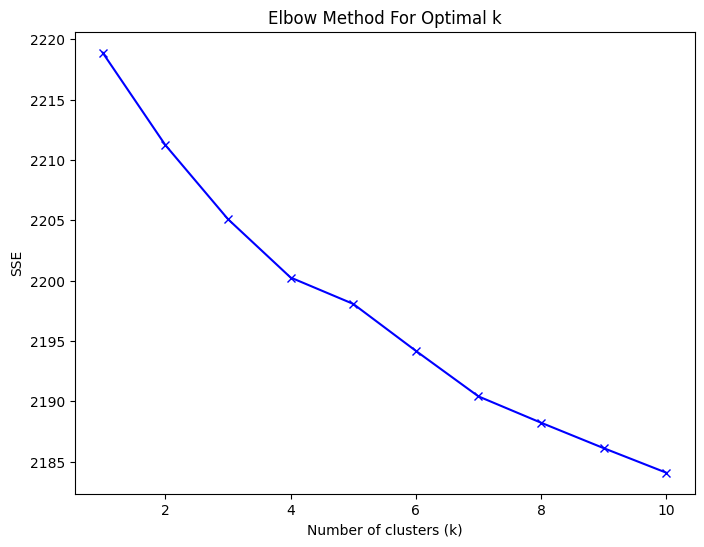

In [39]:
# Define a range of k values
k_values = range(1, 11)

vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(df['all_descriptions'])
# Fit KMeans and calculate SSE for each k value
sse_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse_values.append(kmeans.inertia_)

# Plot the SSE values against the k values
plt.figure(figsize=(8, 6))
plt.plot(k_values, sse_values, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()